In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('E:\\学习\\cs634\\hotel-booking-demand\\hotel_bookings.csv')

In [5]:
column_names = sorted(list(data.columns))

In [6]:
column_names

['adr',
 'adults',
 'agent',
 'arrival_date_day_of_month',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_year',
 'assigned_room_type',
 'babies',
 'booking_changes',
 'children',
 'company',
 'country',
 'customer_type',
 'days_in_waiting_list',
 'deposit_type',
 'distribution_channel',
 'hotel',
 'is_canceled',
 'is_repeated_guest',
 'lead_time',
 'market_segment',
 'meal',
 'previous_bookings_not_canceled',
 'previous_cancellations',
 'required_car_parking_spaces',
 'reservation_status',
 'reservation_status_date',
 'reserved_room_type',
 'stays_in_week_nights',
 'stays_in_weekend_nights',
 'total_of_special_requests']

In [7]:
for i in column_names:
    missing_rows = data[data[i].isnull()].shape[0]
    print(i + ':' + str(missing_rows))

adr:0
adults:0
agent:16340
arrival_date_day_of_month:0
arrival_date_month:0
arrival_date_week_number:0
arrival_date_year:0
assigned_room_type:0
babies:0
booking_changes:0
children:4
company:112593
country:488
customer_type:0
days_in_waiting_list:0
deposit_type:0
distribution_channel:0
hotel:0
is_canceled:0
is_repeated_guest:0
lead_time:0
market_segment:0
meal:0
previous_bookings_not_canceled:0
previous_cancellations:0
required_car_parking_spaces:0
reservation_status:0
reservation_status_date:0
reserved_room_type:0
stays_in_week_nights:0
stays_in_weekend_nights:0
total_of_special_requests:0


There are a lot of missing values in agent and company, but they are not actually missing values. They just meant that the customer(s) did not make the booking from any company or agent.

In [8]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [7]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
data['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

'Undefined' is the same is SC. So we change it to SC.

In [9]:
data.loc[data['meal'] == 'Undefined', 'meal'] = 'SC'

null value in column agent and company means there was no company or agent involved in the booking, so we change null value to 0

In [10]:
data.loc[data['agent'].isnull(), 'agent'] = 0
data.loc[data['company'].isnull(), 'company'] = 0

In [11]:
data.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [12]:
# drop rows with very small numebr of missing values
missing = [
    'country', 
    'children']
data = data.dropna(subset=missing)

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,118898.0,0.371352,0.483168,0.00,0.0,0.0,1.0,1.0
lead_time,118898.0,104.311435,106.903309,0.00,18.0,69.0,161.0,737.0
arrival_date_year,118898.0,2016.157656,0.707459,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,118898.0,27.166555,13.589971,1.00,16.0,28.0,38.0,53.0
arrival_date_day_of_month,118898.0,15.800880,8.780324,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,118898.0,0.928897,0.996216,0.00,0.0,1.0,2.0,16.0
stays_in_week_nights,118898.0,2.502145,1.900168,0.00,1.0,2.0,3.0,41.0
adults,118898.0,1.858391,0.578576,0.00,2.0,2.0,2.0,55.0
children,118898.0,0.104207,0.399172,0.00,0.0,0.0,0.0,10.0
babies,118898.0,0.007948,0.097380,0.00,0.0,0.0,0.0,10.0


It is impossible for adr to be lower than 0, so drop these rows.

In [14]:
data1 = data[data['adr'] > 0]

not clear what ADR really means
next step: correlation analysis, relationships between target variable and all the attributes, dummy variables, drive new variables(?)

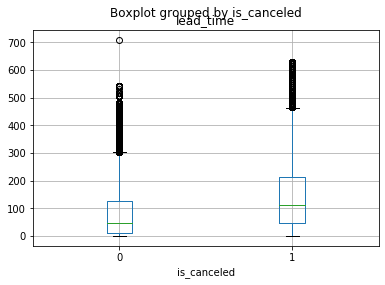

In [15]:
data1.boxplot(column = 'lead_time', by = 'is_canceled')

lead_time has a big impact on is_canceled

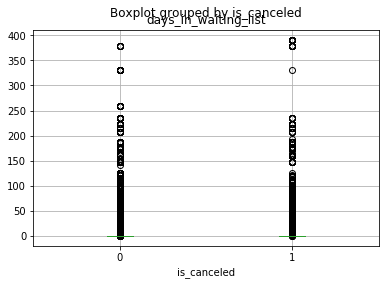

In [16]:
data1.boxplot(column = 'days_in_waiting_list', by = 'is_canceled')

In [17]:
print(data1.loc[data1['is_canceled'] == 0, 'days_in_waiting_list'].describe())
print()
print(data1.loc[data1['is_canceled'] == 1, 'days_in_waiting_list'].describe())

count    73009.000000
mean         1.606131
std         14.895648
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        379.000000
Name: days_in_waiting_list, dtype: float64

count    43950.000000
mean         3.578658
std         21.537119
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        391.000000
Name: days_in_waiting_list, dtype: float64


Customers that have waited for a longer time are less likely to cancel. 

count    73009.000000
mean         0.014108
std          0.264495
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: previous_cancellations, dtype: float64

count    43950.000000
mean         0.207986
std          1.335620
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         26.000000
Name: previous_cancellations, dtype: float64


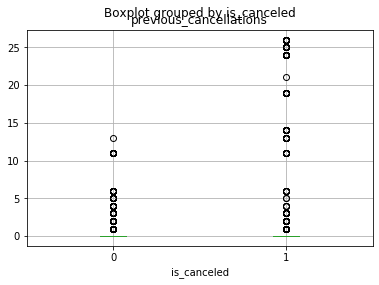

In [18]:
data1.boxplot(column = 'previous_cancellations', by = 'is_canceled')
print(data1.loc[data1['is_canceled'] == 0, 'previous_cancellations'].describe())
print()
print(data1.loc[data1['is_canceled'] == 1, 'previous_cancellations'].describe())

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000255292C53C8>,
      dtype=object)

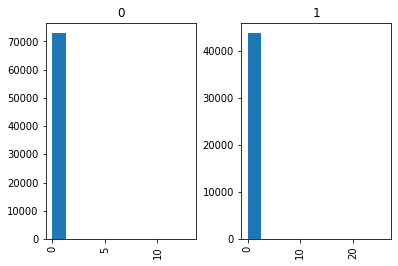

In [19]:
data1.hist(column = 'previous_cancellations', by = 'is_canceled')

Customers who have canceled before are more likely to cancel.

<BarContainer object of 4 artists>

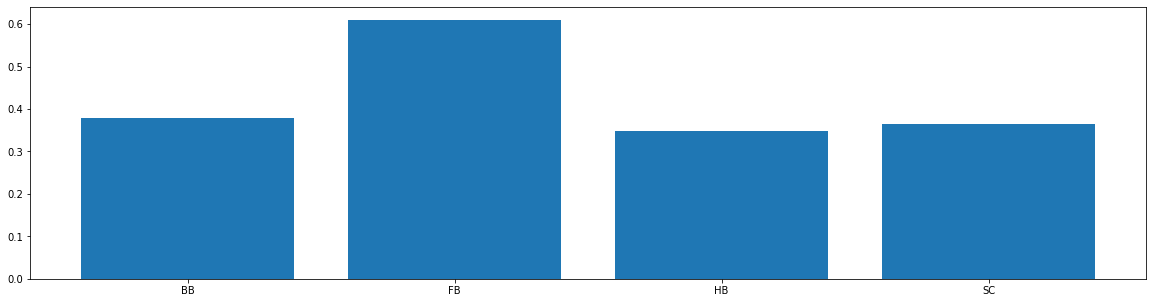

In [20]:
group_by_meal = data1.groupby(by='meal').mean()['is_canceled']
plt.figure(figsize=(20, 5))
# plt.xticks(rotation=90)
plt.bar(group_by_meal.index, group_by_meal.values)

Type of meal seems to have an impact

<BarContainer object of 2 artists>

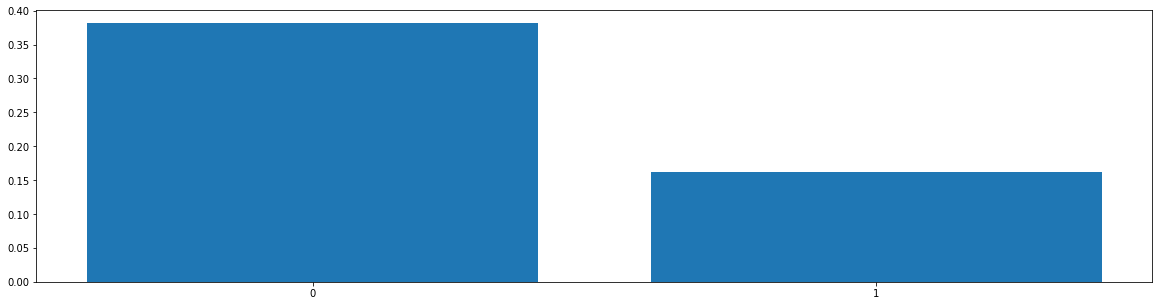

In [21]:
group_by_repeat = data1.groupby(by='is_repeated_guest').mean()['is_canceled']
plt.figure(figsize=(20, 5))
# plt.xticks(rotation=90)
plt.xticks([0,1])
plt.bar(group_by_repeat.index, group_by_repeat.values)

Customers who have been to the hotel are less likely to cancel, which is understandable.

<BarContainer object of 4 artists>

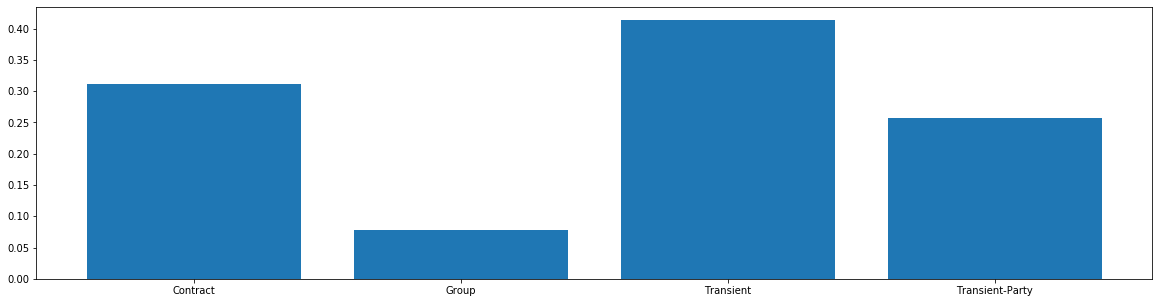

In [22]:
group_by_customertype = data1.groupby(by='customer_type').mean()['is_canceled']
plt.figure(figsize=(20, 5))
# plt.xticks(rotation=90)
# plt.xticks([0,1])
plt.bar(group_by_customertype.index, group_by_customertype.values)

<BarContainer object of 20 artists>

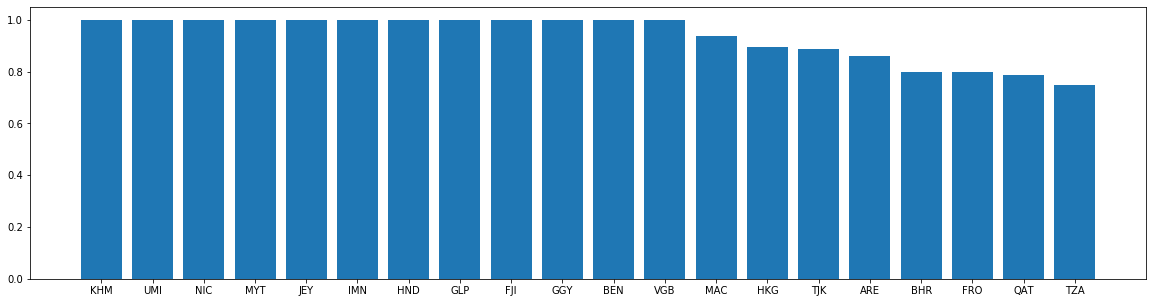

In [23]:
group_by_country = data1.groupby(by='country', axis = 0).mean()['is_canceled']
copy = group_by_country[:]
copy.sort_values(ascending = False, inplace = True)
plt.figure(figsize=(20, 5))
# plt.xticks(rotation=90)
plt.bar(copy[:20].index, copy[:20].values)

In [54]:
group_by_country_count = data1.groupby(by='country', axis = 0).count()
group_by_country_average = data1.groupby(by='country', axis = 0).mean()

<BarContainer object of 20 artists>

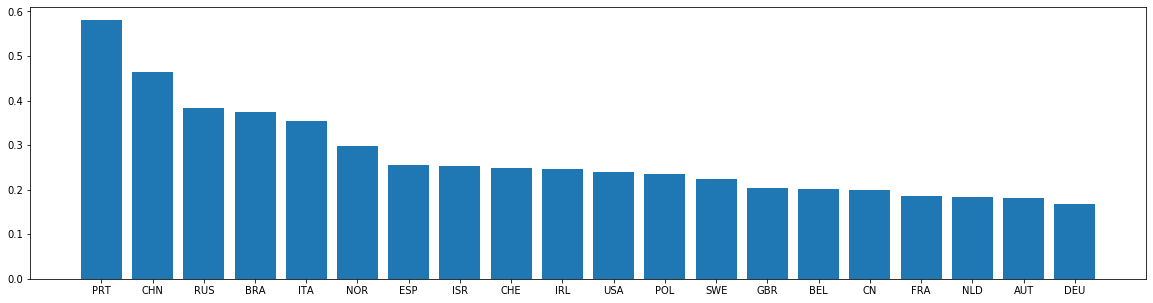

In [25]:
group_by_country_count = data1.groupby(by='country', axis = 0).count()
group_by_country_average = data1.groupby(by='country', axis = 0).mean()
copy = group_by_country_average.loc[group_by_country_count['is_canceled'] > 500, 'is_canceled'][:]
copy.sort_values(ascending = False, inplace = True)
plt.figure(figsize=(20, 5))
plt.bar(copy.index[:20], copy.values[:20])

In [36]:
data['country'].value_counts()

PRT    48586
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
VGB        1
BDI        1
DMA        1
FJI        1
SLE        1
Name: country, Length: 177, dtype: int64

choose countries with more than 1000 customers

<BarContainer object of 3 artists>

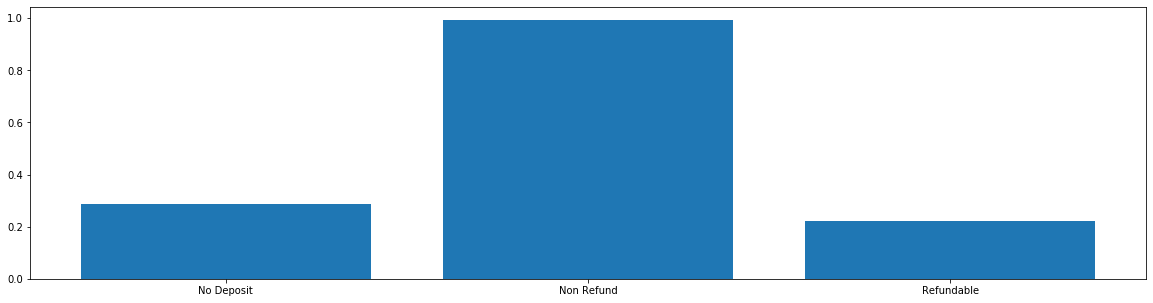

In [26]:
group_by_deposit_type = data1.groupby(by='deposit_type').mean()['is_canceled']
plt.figure(figsize=(20, 5))
# plt.xticks(rotation=90)
# plt.xticks([0,1])
plt.bar(group_by_deposit_type.index, group_by_deposit_type.values)

In [27]:
data1['deposit_type'].value_counts()

No Deposit    102224
Non Refund     14573
Refundable       162
Name: deposit_type, dtype: int64

weird!

<BarContainer object of 6 artists>

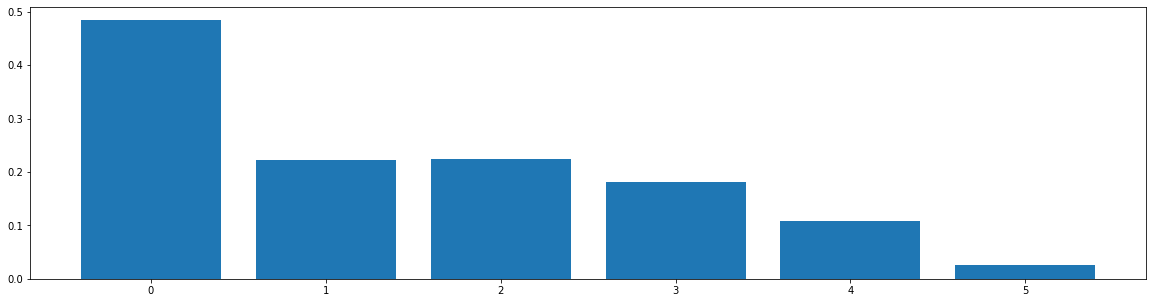

In [28]:
group_by_requests = data1.groupby(by='total_of_special_requests').mean()['is_canceled']
plt.figure(figsize=(20, 5))
# plt.xticks(rotation=90)
# plt.xticks([0,1])
plt.bar(group_by_requests.index, group_by_requests.values)

the more special requests you make, the less likely you are to cancel

feature engineering

In [30]:
data1.shape

(116959, 32)

In [31]:
data1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
df_le = data1.copy()
le = LabelEncoder()

categoricals = [
    'arrival_date_month',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'agent',
    'company',
    'customer_type',
    'reservation_status',
]

for col in categoricals:
    df_le[col] = le.fit_transform(df_le[col])



In [34]:
df_le

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,5,27,1,0,1,1,...,0,0,0,0,2,75.00,0,0,1,2015-07-02
3,Resort Hotel,0,13,2015,5,27,1,0,1,1,...,0,220,0,0,2,75.00,0,0,1,2015-07-02
4,Resort Hotel,0,14,2015,5,27,1,0,2,2,...,0,174,0,0,2,98.00,0,1,1,2015-07-03
5,Resort Hotel,0,14,2015,5,27,1,0,2,2,...,0,174,0,0,2,98.00,0,1,1,2015-07-03
6,Resort Hotel,0,0,2015,5,27,1,0,2,2,...,0,0,0,0,2,107.00,0,0,1,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,1,35,30,2,5,2,...,0,271,0,0,2,96.14,0,0,1,2017-09-06
119386,City Hotel,0,102,2017,1,35,31,2,5,3,...,0,9,0,0,2,225.43,0,2,1,2017-09-07
119387,City Hotel,0,34,2017,1,35,31,2,5,2,...,0,9,0,0,2,157.71,0,4,1,2017-09-07
119388,City Hotel,0,109,2017,1,35,31,2,5,2,...,0,78,0,0,2,104.40,0,0,1,2017-09-07


In [68]:
data1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,0.0,0.0,0,Transient,107.00,0,0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [35]:
# these two variables are meaningless
df_le = df_le.drop(['reservation_status','reservation_status_date'], axis=1)

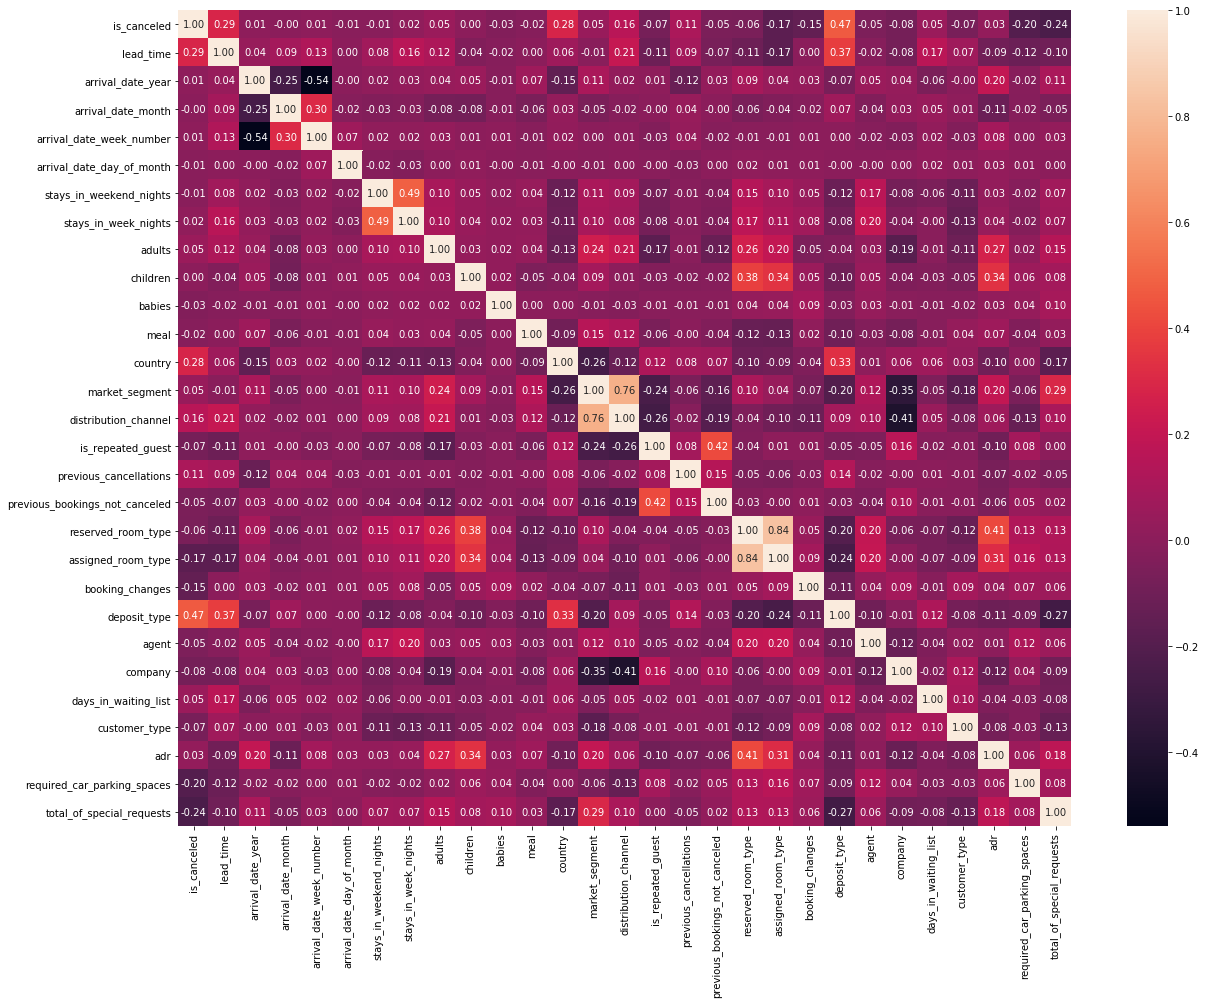

In [36]:
import seaborn as sns

plt.figure(figsize=(20, 15))
sns.heatmap(df_le.corr(), annot=True, fmt='.2f')

In [38]:
df_le.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [39]:
df_le['arrival_date_year'].value_counts()

2016    55531
2017    40155
2015    21273
Name: arrival_date_year, dtype: int64

In [40]:
# drop these columns because of high correlation
df_le = df_le.drop(['arrival_date_year','assigned_room_type','market_segment'], axis=1)

In [41]:
df_le.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [42]:
df_le['booking_changes'].value_counts()

0     99508
1     12265
2      3695
3       898
4       356
5       109
6        58
7        27
8        13
9         7
10        6
13        4
14        3
15        3
12        2
16        2
17        1
11        1
18        1
Name: booking_changes, dtype: int64

In [43]:
# this column is meaningless
df_le = df_le.drop(['booking_changes'], axis=1)

In [44]:
# to make the model more general, we drop country
df_le = df_le.drop(['country'], axis=1)

In [45]:
df_le

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
2,Resort Hotel,0,7,5,27,1,0,1,1,0.0,...,0,0,0,0,0,0,2,75.00,0,0
3,Resort Hotel,0,13,5,27,1,0,1,1,0.0,...,0,0,0,220,0,0,2,75.00,0,0
4,Resort Hotel,0,14,5,27,1,0,2,2,0.0,...,0,0,0,174,0,0,2,98.00,0,1
5,Resort Hotel,0,14,5,27,1,0,2,2,0.0,...,0,0,0,174,0,0,2,98.00,0,1
6,Resort Hotel,0,0,5,27,1,0,2,2,0.0,...,0,2,0,0,0,0,2,107.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,1,35,30,2,5,2,0.0,...,0,0,0,271,0,0,2,96.14,0,0
119386,City Hotel,0,102,1,35,31,2,5,3,0.0,...,0,4,0,9,0,0,2,225.43,0,2
119387,City Hotel,0,34,1,35,31,2,5,2,0.0,...,0,3,0,9,0,0,2,157.71,0,4
119388,City Hotel,0,109,1,35,31,2,5,2,0.0,...,0,0,0,78,0,0,2,104.40,0,0


In [46]:
df_le.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [104]:
data1['distribution_channel']

2            Direct
3         Corporate
4             TA/TO
5             TA/TO
6            Direct
            ...    
119385        TA/TO
119386        TA/TO
119387        TA/TO
119388        TA/TO
119389        TA/TO
Name: distribution_channel, Length: 116959, dtype: object

In [105]:
categoricals

['arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'agent',
 'company',
 'customer_type',
 'reservation_status']

In [47]:
new_columns = [i for i in df_le.columns]

In [48]:
new_columns

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [49]:
data2 = data1[new_columns]

In [50]:
data2

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,...,0,A,No Deposit,0.0,0.0,0,Transient,75.00,0,0
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,...,0,A,No Deposit,304.0,0.0,0,Transient,75.00,0,0
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,...,0,A,No Deposit,240.0,0.0,0,Transient,98.00,0,1
5,Resort Hotel,0,14,July,27,1,0,2,2,0.0,...,0,A,No Deposit,240.0,0.0,0,Transient,98.00,0,1
6,Resort Hotel,0,0,July,27,1,0,2,2,0.0,...,0,C,No Deposit,0.0,0.0,0,Transient,107.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,August,35,30,2,5,2,0.0,...,0,A,No Deposit,394.0,0.0,0,Transient,96.14,0,0
119386,City Hotel,0,102,August,35,31,2,5,3,0.0,...,0,E,No Deposit,9.0,0.0,0,Transient,225.43,0,2
119387,City Hotel,0,34,August,35,31,2,5,2,0.0,...,0,D,No Deposit,9.0,0.0,0,Transient,157.71,0,4
119388,City Hotel,0,109,August,35,31,2,5,2,0.0,...,0,A,No Deposit,89.0,0.0,0,Transient,104.40,0,0


In [51]:
new_categoricals = [col for col in categoricals if col in data2.columns]
data_dummy = pd.get_dummies(data=data2, columns=new_categoricals)

In [52]:
new_categoricals

['arrival_date_month',
 'meal',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'agent',
 'company',
 'customer_type']

In [53]:
data_dummy

,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,company_530.0,company_531.0,company_534.0,company_539.0,company_541.0,company_543.0,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
2,Resort Hotel,0,7,27,1,0,1,1,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,Resort Hotel,0,13,27,1,0,1,1,0.0,0,...,0,0,0,0,0,0,0,0,1,0
4,Resort Hotel,0,14,27,1,0,2,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
5,Resort Hotel,0,14,27,1,0,2,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
6,Resort Hotel,0,0,27,1,0,2,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,35,30,2,5,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
119386,City Hotel,0,102,35,31,2,5,3,0.0,0,...,0,0,0,0,0,0,0,0,1,0
119387,City Hotel,0,34,35,31,2,5,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
119388,City Hotel,0,109,35,31,2,5,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0


In [54]:
data2.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116959 entries, 2 to 119389
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   hotel                           116959 non-null  bool 
 1   is_canceled                     116959 non-null  bool 
 2   lead_time                       116959 non-null  bool 
 3   arrival_date_month              116959 non-null  bool 
 4   arrival_date_week_number        116959 non-null  bool 
 5   arrival_date_day_of_month       116959 non-null  bool 
 6   stays_in_weekend_nights         116959 non-null  bool 
 7   stays_in_week_nights            116959 non-null  bool 
 8   adults                          116959 non-null  bool 
 9   children                        116959 non-null  bool 
 10  babies                          116959 non-null  bool 
 11  meal                            116959 non-null  bool 
 12  distribution_channel            116959 non-n

In [55]:
data2['distribution_channel'].value_counts()

TA/TO        96776
Direct       13682
Corporate     6311
GDS            189
Undefined        1
Name: distribution_channel, dtype: int64

In [57]:
data2

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,...,0,A,No Deposit,0.0,0.0,0,Transient,75.00,0,0
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,...,0,A,No Deposit,304.0,0.0,0,Transient,75.00,0,0
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,...,0,A,No Deposit,240.0,0.0,0,Transient,98.00,0,1
5,Resort Hotel,0,14,July,27,1,0,2,2,0.0,...,0,A,No Deposit,240.0,0.0,0,Transient,98.00,0,1
6,Resort Hotel,0,0,July,27,1,0,2,2,0.0,...,0,C,No Deposit,0.0,0.0,0,Transient,107.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,August,35,30,2,5,2,0.0,...,0,A,No Deposit,394.0,0.0,0,Transient,96.14,0,0
119386,City Hotel,0,102,August,35,31,2,5,3,0.0,...,0,E,No Deposit,9.0,0.0,0,Transient,225.43,0,2
119387,City Hotel,0,34,August,35,31,2,5,2,0.0,...,0,D,No Deposit,9.0,0.0,0,Transient,157.71,0,4
119388,City Hotel,0,109,August,35,31,2,5,2,0.0,...,0,A,No Deposit,89.0,0.0,0,Transient,104.40,0,0


In [128]:
data2.to_csv (r'E:\学习\cs634\Final Project\export_dataframe.csv', index = False, header=True)